<a href="https://colab.research.google.com/github/yuriishizawa/stock_analysis/blob/main/apresentacao_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Retorno de Ações e Avaliação de Desempenho de Carteira

#### **Autor**: Yuri Batista Ishizawa
#### **e-mail**: yuriishizawa@gmail.com
#### **Github**: https://github.com/yuriishizawa
#### **LinkedIn**: https://www.linkedin.com/in/yuriishizawa

# Atualizando os pacotes

In [13]:
!pip install --upgrade plotly -q && pip install yfinance -q

## Importação dos pacotes
É necessário resetar o notebook para aplicar as atualizações dos pacotes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import pandas_datareader as pdr
import yfinance as yf

sns.set()

%matplotlib inline

## Coleta dos dados

Foram consideradas as 20 maiores empresas da BOVESPA em termos de valor de mercado. 

Fonte: https://www.meusdividendos.com/empresas/ranking?q=valorMercado

In [2]:
tickers = ['VALE3', 'PETR4', 'BPAC3', 'ABEV3', 'ITUB4', 'SANB4', 'AZUL4', 'BBDC4', 'KLBN4', 'BBAS3',
           'ITSA4', 'JBSS3', 'GOLL4', 'SUZB3', 'VIVT3', 'CSNA3', 'ELET3', 'B3SA3', 'WEGE3', 'GGBR4']

for i, j in enumerate(tickers):
    if j.endswith('.SA'):
        pass
    else:
        tickers[i] = j + '.SA'

In [3]:
data = pdr.DataReader(tickers,
                         data_source='yahoo',start='2020-01-01', end='2021-05-13')
data.head()

Attributes  Adj Close                        ...      Volume                       
Symbols      VALE3.SA   PETR4.SA   BPAC3.SA  ...    B3SA3.SA   WEGE3.SA    GGBR4.SA
Date                                         ...                                   
2020-01-02  49.901928  29.698208  39.495380  ...  59905800.0  2938000.0  13591400.0
2020-01-03  49.534527  29.456367  38.675850  ...  42734400.0  3672900.0  14334500.0
2020-01-06  49.240608  29.804619  38.507999  ...  60060900.0  3183300.0  11646800.0
2020-01-07  49.598820  29.688534  38.530437  ...  44786100.0  3151800.0  12411800.0
2020-01-08  49.608006  29.504732  38.530437  ...  40292100.0  4076900.0   9498700.0

[5 rows x 120 columns]

## Fazendo resample para preencher fins de semana e feriados

In [4]:
data.resample('D').ffill()
data['Adj Close'].columns.values

array(['VALE3.SA', 'PETR4.SA', 'BPAC3.SA', 'ABEV3.SA', 'ITUB4.SA',
       'SANB4.SA', 'AZUL4.SA', 'BBDC4.SA', 'KLBN4.SA', 'BBAS3.SA',
       'ITSA4.SA', 'JBSS3.SA', 'GOLL4.SA', 'SUZB3.SA', 'VIVT3.SA',
       'CSNA3.SA', 'ELET3.SA', 'B3SA3.SA', 'WEGE3.SA', 'GGBR4.SA'],
      dtype=object)

In [5]:
df = pd.DataFrame(data['Adj Close'].values, index=data.index, columns = data['Adj Close'].columns.values)
df.head()

,VALE3.SA,PETR4.SA,BPAC3.SA,ABEV3.SA,ITUB4.SA,SANB4.SA,AZUL4.SA,BBDC4.SA,KLBN4.SA,BBAS3.SA,ITSA4.SA,JBSS3.SA,GOLL4.SA,SUZB3.SA,VIVT3.SA,CSNA3.SA,ELET3.SA,B3SA3.SA,WEGE3.SA,GGBR4.SA
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02,49.901928,29.698208,39.495380,18.616690,36.574875,22.399773,58.799999,30.071018,3.586141,50.686829,13.654171,25.730480,37.169998,40.790001,42.697460,14.464794,31.810432,13.056005,34.785870,20.138529
2020-01-03,49.534527,29.456367,38.675850,18.354891,36.190174,22.989241,56.759998,30.086237,3.686034,50.602039,13.454354,25.985889,35.900002,40.650002,43.193115,14.356482,31.327192,12.679695,34.341663,19.808708
2020-01-06,49.240608,29.804619,38.507999,18.442158,35.651608,21.705475,55.000000,29.548859,3.686034,49.933125,13.425810,25.371010,34.250000,40.580002,42.777115,14.002000,31.477167,12.558135,34.430508,19.760204
2020-01-07,49.598820,29.688534,38.530437,18.480942,34.824512,21.392691,56.820000,29.035547,3.706012,49.556263,13.245022,25.825075,34.450001,41.099998,43.724178,14.002000,32.285339,12.963361,34.697029,20.070627
2020-01-08,49.608006,29.504732,38.530437,18.393677,34.257084,21.098858,56.919998,28.586292,3.735980,49.104042,13.045205,26.458878,35.810001,43.150002,44.166725,13.982306,32.751919,12.928629,33.384171,20.148232


## Análise Exploratória dos Dados

### Conversão de formato tidy para formato long

In [6]:
df_melt = df.reset_index().melt(id_vars='Date', var_name='Index', value_name='Preço Ajustado')
df_melt

,Date,Index,Preço Ajustado
0,2020-01-02,VALE3.SA,49.901928
1,2020-01-03,VALE3.SA,49.534527
2,2020-01-06,VALE3.SA,49.240608
3,2020-01-07,VALE3.SA,49.598820
4,2020-01-08,VALE3.SA,49.608006
...,...,...,...
6695,2021-05-07,GGBR4.SA,35.949657
6696,2021-05-10,GGBR4.SA,35.959545
6697,2021-05-11,GGBR4.SA,37.214867
6698,2021-05-12,GGBR4.SA,36.226425


In [32]:
def plot_melted(df, yaxis = 'Preço Ajustado',dash = False):
    df_melt = df.reset_index().melt(id_vars='Date', var_name='Symbol', value_name='Preço Ajustado')
    fig = px.line(df_melt, x="Date", y="Preço Ajustado", color="Symbol",labels={'Preço Ajustado': yaxis})
    if dash:
        fig.add_hline(1,line_dash="dash")
    fig.update_xaxes(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
    fig.show()
    return fig, df_melt

## Obtenção do retorno diário acumulado

In [33]:
df_return = df.apply(lambda x: x/x[0])
fig1, df_return_melted = plot_melted(df_return, 'Retorno diário acumulado', dash=True)

### Agrupando tickers de acordo com retornos

<Figure size 432x288 with 0 Axes>

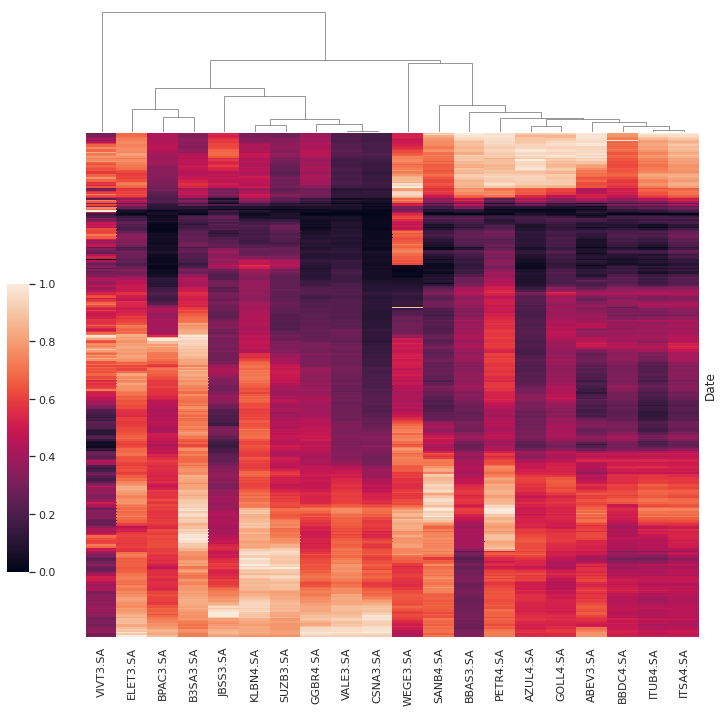

In [9]:
plt.figure()
sns.clustermap(df_return, row_cluster=False, metric='correlation',
               yticklabels=False,standard_scale=1,dendrogram_ratio=(.1, .2),cbar_pos=(0, .2, .03, .4))
plt.show()

In [24]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)

X = np.random.rand(15, 12) # 15 samples, with 12 dimensions each
fig = ff.create_dendrogram(df_return.T, labels=df_return.columns)
fig.show()

In [21]:
df_return.T.shape

(20, 335)

### Análise de volatilidade

In [25]:
df_perc_change = df.pct_change().dropna()
df_perc_change_melted = plot_melted(df_perc_change, 'Retorno diário')

In [26]:
mean_std = pd.DataFrame(df_perc_change.mean(),index=df_perc_change.mean().index, columns=['Média'])
mean_std['Desvio-padrão'] = df_perc_change.std().values
fig = px.scatter(mean_std.reset_index(), x="Desvio-padrão", y="Média",text='index')
fig.add_hline(0,line_dash='dash')
fig.show()

# Análise de performance de portifólio

### Gerando carteira com pesos aleatórios para cada ticker

In [27]:
portifolio = pd.DataFrame(df.T.iloc[:,0])
portifolio.columns=['Preço Ajustado']

sectors = []

for column in portifolio.index:
    sectors.append(yf.Ticker(column).info['sector'])

portifolio['Setor'] = sectors
portifolio['Quantidade'] = np.random.randint(100,1000, size=portifolio.shape[0])
portifolio['Total Investido'] = portifolio['Preço Ajustado'].mul(portifolio['Quantidade']).apply(lambda x: round(x,2))
portifolio['Porc. da Carteira'] = portifolio['Total Investido'].div(portifolio['Total Investido'].sum()).mul(100)
portifolio.reset_index(inplace=True)
portifolio.head()

,index,Preço Ajustado,Setor,Quantidade,Total Investido,Porc. da Carteira
0,VALE3.SA,49.901928,Basic Materials,781,38973.41,11.780641
1,PETR4.SA,29.698208,Energy,558,16571.60,5.009161
2,BPAC3.SA,39.495380,Financial Services,817,32267.73,9.753689
3,ABEV3.SA,18.616690,Consumer Defensive,426,7930.71,2.397246
4,ITUB4.SA,36.574875,Financial Services,765,27979.78,8.457555


### Gráfico de pizza agrupando por setores

In [28]:
fig = px.sunburst(portifolio, path = ['Setor', 'index'], values='Porc. da Carteira', hover_data=['Total Investido'],
                  width=700, height=700, title='Distribuição dos papéis na carteira')
fig.show()

## Retorno da Carteira

In [29]:
a = np.dot(df_return.values,portifolio.set_index('index')['Porc. da Carteira'].div(100).values)

In [30]:
ibov=pdr.DataReader('^BVSP', data_source='yahoo', start='2020-01-01', end='2021-05-13')
ibov = ibov.apply(lambda x: x/x[0])['Adj Close']

In [31]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_return.index,y=a,
                    mode='lines',
                    name='Carteira'))

fig.add_hline(1,line_dash="dash")
fig.add_trace(go.Scatter(x=ibov.index, y=ibov.values,
                    mode='lines',
                    name='IBOV'))
fig.update_layout(title='Performance da Carteira vs Performance IBOV',
                   xaxis_title='Data',
                   yaxis_title='Retorno diário acumulado')

fig.show()
print(f'Para o valor investido de {portifolio["Total Investido"].sum():.02f} reais, em janeiro de 2020, seria possível, com nossa carteira, gerar um rendimento de: {portifolio["Total Investido"].sum()*(a[-1]-1):.02f} reais')

Para o valor investido de 330825.89 reais, em janeiro de 2020, seria possível, com nossa carteira, gerar um rendimento de: 93908.89 reais
